$$
\newcommand{\R}{\mathbb{R}}
\newcommand{\C}{\mathbb{C}}
\renewcommand{\Re}{\mathrm{Re}}
\renewcommand{\Im}{\mathrm{Im}}
\newcommand{\Sin}{S_{\mathrm{in}}}
\newcommand{\dd}{\mathrm{d}}
\newcommand{\ds}{\mathrm{d}s}
\newcommand{\dx}{\mathrm{d}x}
\newcommand{\dt}{\mathrm{d}t}
\newcommand{\dq}{\mathrm{d}q}
\newcommand{\ddt}{\frac{\dd}{\dt}}
\newcommand{\dsdt}{\frac{\ds}{\dt}}
\newcommand{\dxdt}{\frac{\dx}{\dt}}
\newcommand{\dqdt}{\frac{\dq}{\dt}}
\newcommand{\partials}[2]{\frac{\partial#1}{\partial#2}}
\newcommand{\gL}{g\cdot L^{-1}}
\newcommand{\CC}{\mathcal{C}}
\newcommand{\span}{\mathrm{span}}
\newcommand{\pp}[1]{\left(#1\right)}
\newcommand{\bb}[1]{\left[#1\right]}
\newcommand{\cb}[1]{\left\{#1\right\}}
\newcommand{\abs}[1]{\left\lvert#1\right\rvert}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\sset}[2]{\cb{#1\left\lvert#2\right.}}
\newcommand{\mat}[1]{\begin{matrix}#1\end{matrix}}
\newcommand{\pmat}[1]{\begin{pmatrix}#1\end{pmatrix}}
\newcommand{\vmat}[1]{\begin{vmatrix}#1\end{vmatrix}}
$$

# Growth of a single species

In this notebook we will study the dynamics of a minimal model of the growth
of a single species in a chemostat.

We start by introducing the model

$$\begin{cases}
\dsdt = -\frac{\mu(\cdot)}{Y}x + D(\Sin - s)\\
\dxdt = (\mu - D)x
\end{cases}$$

where
- $s(t)$ is the substrate concentration ($\gL$) at time $t$
- $x(t)$ is the biomass concentration ($\gL$) at time $t$
- $\Sin$ is the substrate intake concentration ($\gL$)
- $D$ is the dilution rate ($h^{-1}$)
- $\mu(\cdot)$ is a the specific growth velocity function, assumed to be positive and of class $\CC^1$,
  its values are measured in $h^{-1}$.
- $Y$ is the yield of substrate consumption

All of the values and parameters are positive.

## Specific growth velocity $\mu$

For the minimal model, we consider $\mu$ a function of the substrate concentration $s$.
Moreover, we suppose that $\mu$ is of the *Monod type*, such that
- $\mu(0)=0$
- $\mu'(s)>0, \forall s\geq 0$
- $\mu([0,\infty[) = [0,\mu_\max[$

The **Monod function**, verifying these conditions is defined as
$$\mu(s) = \frac{\mu_{\max}s}{k_s + s}$$

where $k_s$ is called the *semi-saturation* constant since $\mu(k_s)=\frac{\mu_\max}{2}$.

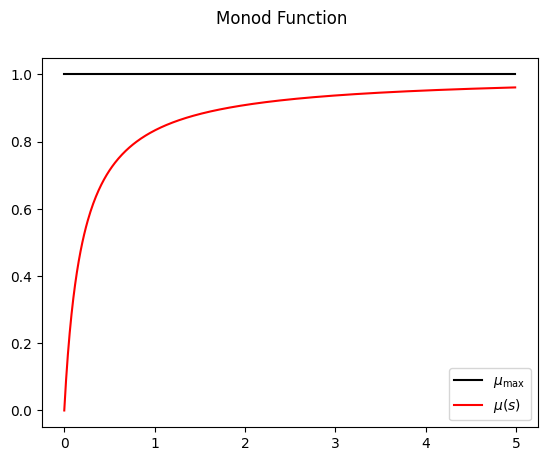

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def mu(s, μmax=1.0, ks=0.2):
    return (μmax*s) / (ks + s)

s = np.arange(0, 5, 0.01)
plt.plot(s, np.ones(len(s)), color='black', label='$\\mu_\\max$')
plt.plot(s, mu(s), color='red', label='$\\mu(s)$')
plt.suptitle("Monod Function")
plt.legend();

## The minimal model definition

We consider the yield $Y$ to be a non-zero constant,
with a simple variable change $\tilde{x}=\frac{x}{Y}$ we get

$$\begin{cases}
\dsdt = -\mu(s)\tilde{x} + D(\Sin - s)\\
\frac{\dd\tilde{x}}{\dt} = \frac{1}{Y}\dxdt = \frac{(\mu(s) - D)x}{Y} = (\mu(s) - D)\tilde{x}
\end{cases}$$

since $Y$ does not intervene in either equations,
it merely is a scaling factor for $x(t)$ and has no effect on the dynamics
of the studied model, we can simply set $Y=1$,
hence obtaining the *minimal model*:

$$\boxed{\begin{cases}
\dsdt = -\mu(s)x + D(\Sin - s)\\
\dxdt = (\mu(s) - D)x
\end{cases}}$$

Now that we have defined the model, so without further ado, we can study its dynamics.

## Model dynamics

### Nullclines

Nullclines (zero-growth isoclines).

#### Biomass nullcline $\dxdt=0$

We seek to find the states of the system $(s, x)$ at which the biomass is invariant.
Let'es denote,
$$ I_x = \sset{(s,x)\in\R^2_+}{\dxdt=0} $$
Expanding the expression for $\dxdt$
\begin{align}
I_x &= \sset{(s,x)\in\R^2_+}{(\mu(s) - D)x=0}\\
&= \sset{(s,x)\in\R^2_+}{x=0} \cup \sset{(s,x)\in\R^2_+}{\mu(s) - D=0,D\lt\mu_\max}\\
&= \cb{(s,0)\in\R^2_+} \cup \sset{(s,x)\in\R^2_+}{\mu(s)=D\lt\mu_\max}\\
&= \cb{(s,0)\in\R^2_+} \cup \sset{(s,x)\in\R^2_+}{s=\mu^{-1}(D),D\lt\mu_\max}\\
&= \cb{(s,0)\in\R^2_+} \cup \sset{(\mu^{-1}(D),x)\in\R^2}{D\lt\mu_\max}
\end{align}

The set $\cb{(s,0)}$ is the horizontal axis, which corresponds to no biomass ($x=0$),
this axis in logically invariant.

The set $\cb{(\mu^{-1}(D),x)}$ corresponds to the vertical line that corresponds
to the substrate concentration $s=\mu^{-1}(D)$ which is a well-defined value
if $D\lt\mu_\max$ for any Monod-type function $\mu$ since a Monod-type function
is monotonic (specifically: increasing) and positive $\forall s\geq 0$.

For the Monod function $\mu(s)=\frac{\mu_\max s}{k_s + s}$,
we can easily find the exression for $\mu^{-1}$ by setting $\mu(s)=r\in[0,\mu_\max[$.
$$\mu(r) = \frac{r k_s}{\mu_\max - r}$$

The biomass nullcline is therefore the union of these two lines
(if the vertical line is well-defined).

#### Substrate nullcline $\dsdt=0$

Similarly as for the biomass, we aim to find the states $(s,x)$
that leave the substrate concentration invariant.
\begin{align}
I_s &= \sset{(s,x)\in\R^2_+}{\dsdt=0}\\
&= \sset{(s,x)\in\R^2_+}{-\mu(s)x + D(\Sin - s) = 0}\\
&= \sset{(s,x)\in\R^2_+}{x = \frac{D(\Sin - s)}{\mu(s)}}\\
&= \cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+}
\end{align}

### Equilibria

We search for the system's equilibria; points at which $\dsdt=0$ and $\dxdt=0$.
The set of equilibrium points can be defined as $E = I_s \cap I_x$.
Which corresponds geometrically to the intersection of the $I_x$ nullclines with the $I_s$ nullcline.

\begin{align}
E &= I_s \cap I_x\\
&= \cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+} \cap \pp{\cb{(s,0)\in\R^2_+} \cup \sset{(\mu^{-1}(D),x)\in\R^2_+}{D\lt\mu_\max}}\\
&= \pp{\cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+} \cap \cb{(s,0)\in\R^2_+}} \cup
   \pp{\cb{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+} \cap \cb{(\mu^{-1}(D),x)\in\R^2_+}}\\
&= \sset{\pp{s,0}\in\R^2_+}{\frac{D(\Sin - s)}{\mu(s)} = 0} \cup
   \sset{\pp{s,\frac{D(\Sin - s)}{\mu(s)}}\in\R^2_+}{s=\mu^{-1}(D)}\\
&= \sset{\pp{s,0}\in\R^2_+}{\Sin - s = 0} \cup
   \cb{\pp{\mu^{-1}(D),\frac{D(\Sin - \mu^{-1}(D))}{\mu(\mu^{-1}(D))}}\in\R^2_+}\\
&= \cb{\pp{\Sin,0}} \cup \sset{\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}}{\Sin - \mu^{-1}(D)>0}\\
&= \underbrace{\cb{\pp{\Sin,0}}}_{E_0} \cup
   \underbrace{\sset{\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}}{\mu(\Sin)>D}}_{E_1}
\end{align}

While $E_0$ exists, and lays on the $x=0$ nullcline, $E_1$ is empty if $\mu(\Sin)<D$
as the equilibrium falls in the fourth quadrant ($x<0$), which does not make
sense as we only deal with positive values of biomass.
In the case $\mu(\Sin)=D$ we have $E_0 = E_1$.

Moreover, $\mu^{-1}(D)$ is only defined for $D\lt\mu_\max$.
Hence, $E_1$ is non-empty for $D\in]\mu(\Sin),\mu_\max[$.

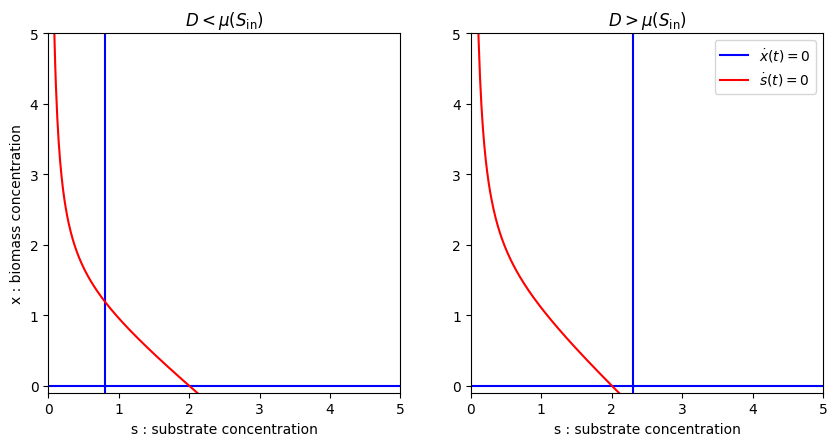

In [2]:
%run ../model.py
%run ../api.py
plt.rcParams["figure.figsize"]=10,10

fig, (ax1,ax2) = plt.subplots(1, 2)
for ax in [ax1, ax2]:
    ax.axis([-0, 5, -0.1, 5])
    ax.axes.set_aspect('equal')
    ax.set_xlabel('s : substrate concentration')

params.update(D=0.8)
plot_isocline_dx(ax1, **params)
plot_isocline_ds(ax1, **params)
ax1.set_title('$D<\\mu(S_\\mathrm{{in}})$')
ax1.set_ylabel('x : biomass concentration')

params.update(D=0.92)
plot_isocline_dx(ax2, **params)
plot_isocline_ds(ax2, **params)
ax2.set_title('$D>\\mu(S_\\mathrm{{in}})$')

plt.legend()
plt.show()

## Local stability around equilibria

Identifying equilibria is the first step in studying a non-linear system,
as the study of the system around its equilibria allows a better understanding
of its global behaviour.

In order to study its local behaviour around equilibria, we linearize the system
with the help of its first order Taylor expansion.

Considering a system, defined by it's state equation $\dqdt = f(q,t)$ where $q(t)$
is the system's state vector at time $t$.
Formally, let $U\subset\R^n$, we have

$$\mat{
f: & U\times\R & \rightarrow & \R^n\\
   & (q,t)     & \mapsto     & \pmat{f_1(q,t)\\\vdots\\ f_n(q,t)}
}$$


The linearized system around an equilibrium $q_0$ is given by the Taylor formula of $f$
$$ f(q,t) = f(q_0,t) + \nabla_q f(q_0,t)(q - q_0) + o(\norm{q-q_0}) $$
where $\nabla_q f$ is the Jacobian of $f$ with respect to $q$, that is

$$\nabla_q f = \pmat{
    \partials{f_1}{q_1} & \cdots & \partials{f_1}{q_n}\\
    \vdots              & \ddots & \vdots\\
    \partials{f_n}{q_1} & \cdots & \partials{f_n}{q_n}
}$$


We can therefore describe the system $\forall q\in B_r(q_0)$ for a sufficiently small $r>0$
where $B_r(q_0) = \sset{q\in\R^n}{\norm{q-q_0}<r}$ is an open ball.
$$\dqdt\approx f(q_0,t) + J_f(q_0)(q(t)-q_0)$$

We can simply translate the system in order to take $q_0$ to the origin,
let $\tilde{q}(t)=q(t)-q_0$, we have a linear system
$$\frac{\dd\tilde{q}}{\dt}\approx J_f(q_0) \tilde{q}(t)$$

### System Jacobian

In the case of the chemostat model

$$\begin{cases}
\dsdt = f_1(s,x) = -\mu(s)x + D(\Sin - s)\\
\dxdt = f_2(s,x) = (\mu(s) - D)x
\end{cases}$$

$$J(s,x) = \pmat{
\partials{f_1}{s} & \partials{f_1}{x}\\
\partials{f_2}{s} & \partials{f_2}{x}}
= \pmat{-\mu'(s)x - D & -\mu(s) \\\mu'(s)x & \mu(s)-D}$$

#### System around $E_0$

$$A=J(\Sin,0)=\pmat{-D & -\mu(\Sin)\\0 & \mu(\Sin)-D}$$

We consider the system in a small open ball around $E_0=(\Sin,0)$,
let $\pmat{\tilde s\\\tilde x} = \pmat{s\\x} - \pmat{\Sin\\0}$.
$$ \ddt\pmat{\tilde s\\\tilde x} = A\pmat{\tilde s\\\tilde x} $$
The eigenvalues and eigenvectors of $A$ allow studying the stability
of the system around $E_0$. Moreover, the solution of the linear system is
$$ \pmat{\tilde s(t)\\\tilde x(t)} = \exp(At) \pmat{\tilde s(0)\\\tilde x(0)} $$
and the exponential of a square matrix is easily obtained from the diagonalized
matrix which has the eigenvalues on its diagonal.

For now, we will only study the eigenvalues, eigenvectors, and eigenspaces.

##### Eigenvalues and Eigenvectors

Let $\lambda\in\C,v\in\R^n$, we say that $\lambda$ is an eigenvalue of $A$
and $v\in\R^n$ is an eigenvector of $A$ associated to $\lambda$ if and only if
$$ A v = \lambda v$$
Or equivalently, $(A-\lambda Id)v = 0_{\R^n}$.

The eigenvalues are the roots of the characteristic polynomial $\chi_\lambda=\det(A-\lambda Id)$
and the associated eigenspace $S=\ker(A-\lambda Id)$.

Here,
$$\chi_\lambda=\det(A-\lambda Id)
= \vmat{-\mu'(s)x - D - \lambda & -\mu(s) \\\mu'(s)x & \mu(s)-D - \lambda}
= (-D-\lambda)(\mu(\Sin)-D-\lambda)
\implies \begin{cases}
\lambda_1 = -D\\
\lambda_2 = \mu(\Sin)-D
\end{cases}$$

- $S_{A,1} = \ker(A-\lambda_1 Id) = \ker(A+D Id) = \ker\pmat{0 & -\mu(\Sin)\\0 & \mu(\Sin)} = \ker\pmat{0 & -1\\0 & 1} = \span\cb{\pmat{1\\0}}$
- $S_{A,2} = \ker(A-\lambda_2 Id) = \ker(A-(\mu(\Sin)-D) Id) = \ker\pmat{-\mu(\Sin)&-\mu(\Sin)\\0&0} = \ker\pmat{1&1\\0&0} = \span\cb{\pmat{1\\-1}}$

##### **Stability of a linear system**

In the case of an $n$-dimensional linear system $\dqdt = f(q,t) = Aq(t)$,
the origin is its sole equilibrium $f(q,t)=0\iff q(t)=0_{\R^n}$.

- **Stable** if the system's state does not get further from the equilibrium
  with respect to its initial state $\forall t$.
- **Asymptotically stable** or **attractor** if the system's state converges
  to the equilibrium.
- **Unstable** if the system's state gets further from the equilibrium.

Naturally, if a linear system's state is at the origin,
it stays at the origin, since $f(0_{\R^n},t)=0_{\R^n},\forall t$.
The remaining question is, whether for $q(0)\neq 0_{\R^n}$,
the system's state would get closer/further from the origin,
or maintain the same distance.

In the case of a one-dimensional linear system $\dqdt=a q(t)$
the state can be explicitly expressed as $q(t)=e^{at}q(0)$.

- If $a=0$, then $q(t)=q(0),\forall t$ therefore the system is stable.
- If $a\lt 0$, then $\lim\limits_{t\rightarrow\infty} q(t) = 0$
  therefore the system is asymptotically stable.
- If $a\gt 0$, then $q(t)$ clearly diverges from the origin,
  therefore the system is unstable.

The same reasoning can be applied for an $n$-dimensional system,
as $q(t)=e^{At}q(0)$, therefore the eigenvalues can help determine
the stability at the equilibrium (the origin).
Let $\rho(A)$ be the spectrum of $A$.

- If $\forall \lambda\in\rho(A), \Re(\lambda)\leq 0$ the system is stable.
- If $\forall \lambda\in\rho(A), \Re(\lambda)\lt 0$ the system is asymptotically stable.
- If $\exists \lambda\in\rho(A), \Re(\lambda)\gt 0$ the system is unstable.

##### **Local stability around an equilibrium**

The local stability around an equilibrium is determined
by the stability of the linearized system around that equilibrium.
Since the Jacobian of the system at the equilibrium is the matrix
of the linearized system, we study its spectrum to study its stability.

In the case of $E_0=(\Sin,0)$ the spectrum of the Jacobian is $\rho=\cb{-D,\mu(\Sin)-D}$.
Since $\lambda_1=-D\lt 0$, the stability is solely determined by $\lambda_2=\mu(\Sin)-D$.
- If $D\lt \mu(\Sin)$ then $\lambda_2\gt 0$, then the system is locally unstable around $E_0$.
- If $D\gt \mu(\Sin)$ then $\lambda_2\lt 0$, then $E_0$ is a local attractor
  (i.e. points close enough to $E_0$ converge to $E_0$).

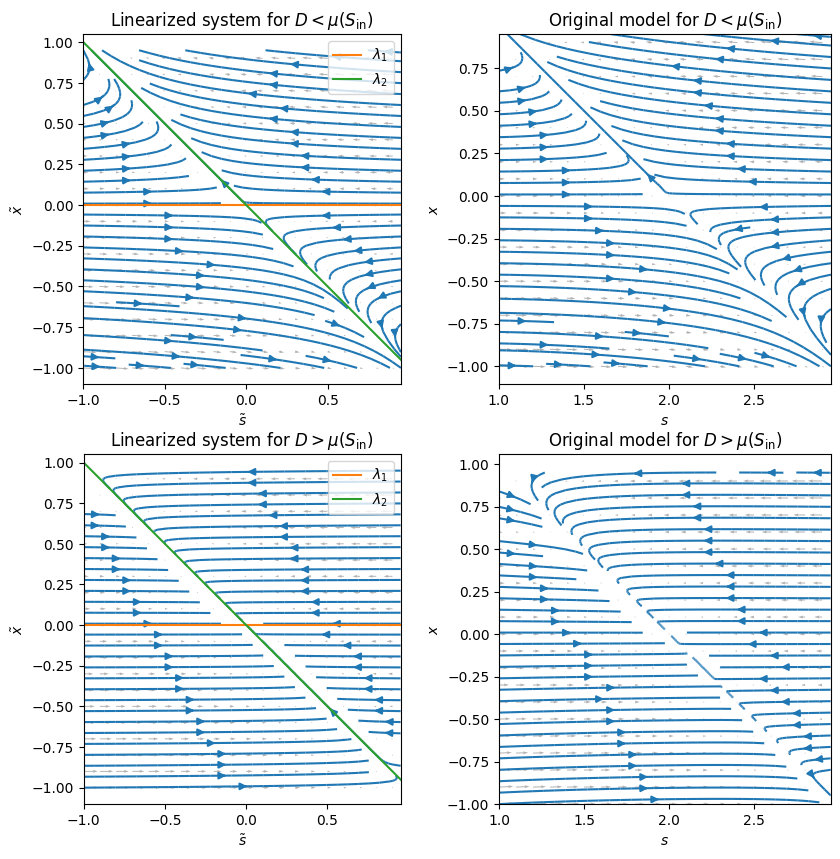

In [3]:
f = growth_rate
pt = [params['Sin'], 0]
size = 1
slim = pt[0] - size, pt[0] + size
xlim = pt[1] - size, pt[1] + size
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=1, alpha=0.3)

def A(s, x, D=1.0, Sin=2.0, μmax=1.0, ks=0.2):
    μ = mu(Sin, μmax=μmax, ks=ks)
    ds = -D*s -μ*x
    dx = (μ-D)*x
    return ds, dx

fig, ax = plt.subplots(2, 2)

params.update(D=0.8)
phase_portrait((-size,size),(-size,size), A, ax=ax[0,0], **plot_params)
plot_eigenspaces([1,0], [1,-1], ax=ax[0,0])
phase_portrait(slim, xlim, f, ax=ax[0,1], **plot_params)

params.update(D=0.92)
phase_portrait((-size,size),(-size,size), A, ax=ax[1,0], **plot_params)
plot_eigenspaces([1,0], [1,-1], ax=ax[1,0])
phase_portrait(slim, xlim, f, ax=ax[1,1], **plot_params)

label = '{} for $D{}\\mu(S_\\mathrm{{in}})$'
ax[0,0].set_title(label.format('Linearized system','<'))
ax[0,1].set_title(label.format('Original model','<'))
ax[1,0].set_title(label.format('Linearized system','>'))
ax[1,1].set_title(label.format('Original model','>'))
for i in [0,1]:
    ax[i,0].legend()
    ax[i,0].set_xlabel('$\\tilde{s}$')
    ax[i,0].set_ylabel('$\\tilde{x}$')
    ax[i,1].set_xlabel('$s$')
    ax[i,1].set_ylabel('$x$')
plt.show()

#### System around $E_1$

We remind that $E_1$ is non-empty only for $D<\mu(\Sin)$ with
$E_1=\cb{\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}}$.
Let's denote $(s_1,x_1)=\pp{\mu^{-1}(D),\Sin - \mu^{-1}(D)}$,
the linearized system matrix is
$$B=J(s_1,x_1)=\pmat{-\mu'(s_1)x_1-D & -D\\\mu'(s_1)x_1 & 0}$$

##### Eigenvalues and Eigenvectors

$$\chi_\lambda=\det(B-\lambda Id)
= \vmat{-\mu'(s_1)x_1-D-\lambda & -D\\\mu'(s_1)x_1 & -\lambda}
= \lambda^2 + (\mu'(s_1)x_1 + D)\lambda + \mu'(s_1)x_1D
\implies \begin{cases}
\lambda_1 = -D\lt 0\\
\lambda_2 = -\mu'(s_1)x_1\lt 0
\end{cases}$$

- $S_{B,1} = \ker(B-\lambda_1 Id) = \ker(A+D Id)
  = \ker\pmat{-\mu'(s_1)x_1 & -D\\\mu'(s_1)x_1 & D}
  = \span\cb{\pmat{D\\-\mu'(s_1)x_1}}$
- $S_{B,2} = \ker(B-\lambda_2 Id) = \ker(A+(\mu'(s_1)x_1) Id)
  = \ker\pmat{-D & -D\\\mu'(s_1)x_1 & \mu'(s_1)x_1}
  = \span\cb{\pmat{1\\-1}}$

##### Stability around $E_1$

Since $\forall \lambda\in\rho(B), \lambda\lt 0$, $E_1$ is a local attractor.

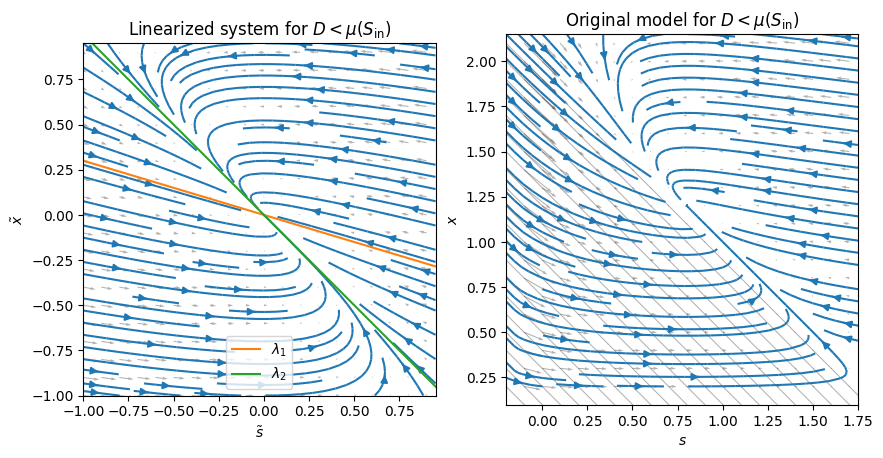

In [7]:
D = 0.8
s1 = mu_inv(D, **params)
pt = [s1, params['Sin'] - s1]
μx = pt[1] * mu_deriv(s1, **params)
params.update(D=D)
size = 1
slim = pt[0] - size, pt[0] + size
xlim = pt[1] - size, pt[1] + size
plot_params = dict(mesh=0.1, step=0.05, dF_params=params, scale=20, density=1, alpha=0.3)

def B(s, x, D=1.0, Sin=2.0, μmax=1.0, ks=0.2):
    s1 = mu_inv(D, μmax=μmax, ks=ks)
    x1 = Sin - s1
    μx = x1 * mu_deriv(s1, μmax=μmax, ks=ks)
    ds = -(μx+D)*s -D*x
    dx = μx*s
    return ds, dx

fig, ax = plt.subplots(1, 2)

phase_portrait((-size,size),(-size,size), B, ax=ax[0], **plot_params)
plot_eigenspaces([D,-μx], [1,-1], t=[-2*size,2*size], ax=ax[0])
phase_portrait(slim, xlim, f, ax=ax[1], **plot_params)

label = '{} for $D{}\\mu(S_\\mathrm{{in}})$'
ax[0].set_title(label.format('Linearized system','<'))
ax[1].set_title(label.format('Original model','<'))
ax[0].legend()
ax[0].set_xlabel('$\\tilde{s}$')
ax[0].set_ylabel('$\\tilde{x}$')
ax[1].set_xlabel('$s$')
ax[1].set_ylabel('$x$')

plt.show()

|       |$$D<\mu(S_\mathrm{{in}})$$|$$D>\mu(S_\mathrm{{in}})$$|
|:-----:|:------------------------:|:------------------------:|
| $E_0$ |         unstable         |          stable          |
| $E_1$ |          stable          |        undefined         |

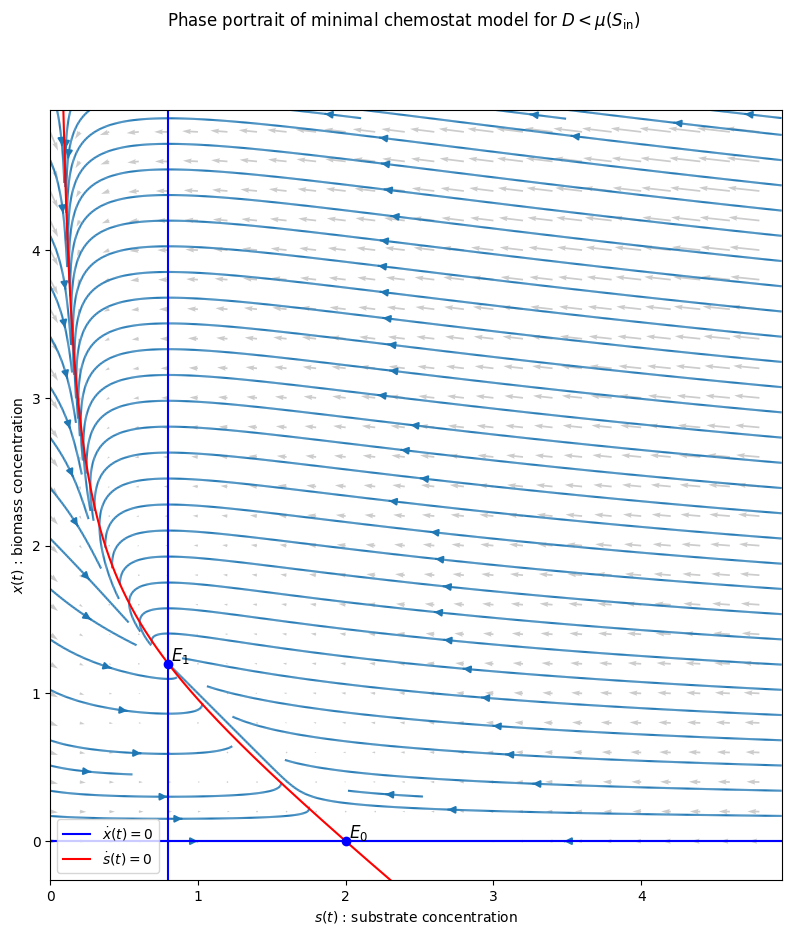

In [8]:
title = 'Phase portrait of minimal chemostat model for $D{}\\mu(S_\\mathrm{{in}})$'
params.update(D=0.8)
ax = phase_portrait((0,5), (0,5), growth_rate, mesh=0.2, step=0.05, dF_params=params,
                    scale=30, density=(25, 1), title=title.format("<"),
                    xlabel='$s(t)$ : substrate concentration',
                    ylabel='$x(t)$ : biomass concentration')
plot_isocline_dx(ax, **params)
plot_isocline_ds(ax, **params)
eq_x = [params['Sin'], s1]
eq_y = [0, params['Sin'] - s1]
eq_text = ['$E_0$', '$E_1$']
ax.plot(eq_x, eq_y, 'bo')
for i in range(2):
    ax.text(eq_x[i] + 0.02, eq_y[i] + 0.02, eq_text[i], fontsize=12)
ax.legend()
plt.show()

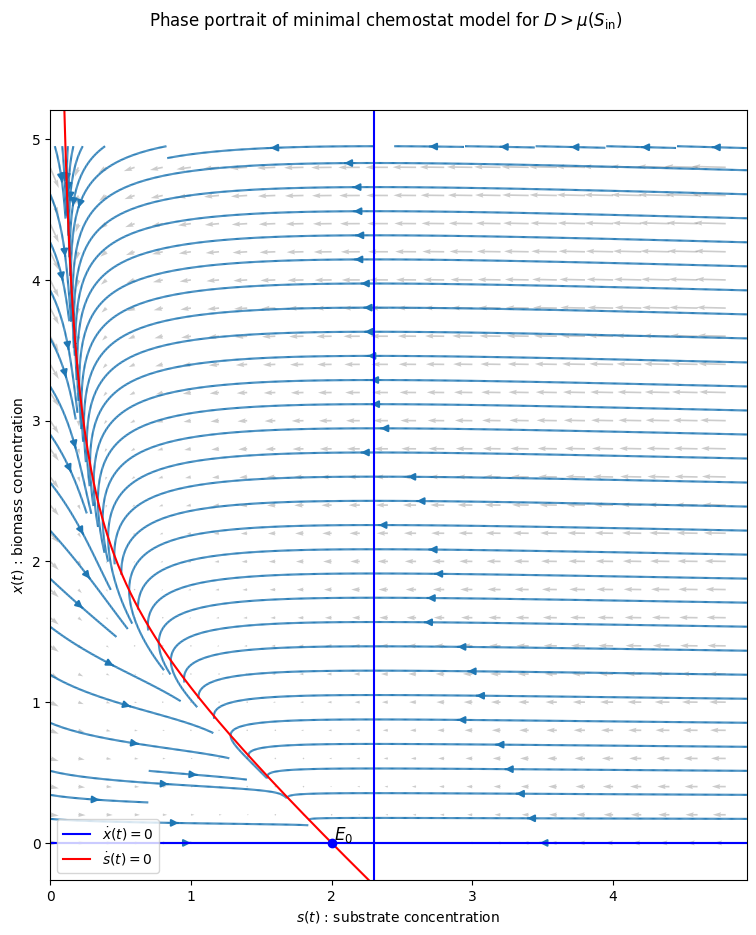

In [9]:
params.update(D=0.92)
ax = phase_portrait((0,5), (0,5), growth_rate, mesh=0.2, step=0.05, dF_params=params,
                    scale=30, density=(25, 1), title=title.format(">"),
                    xlabel='$s(t)$ : substrate concentration',
                    ylabel='$x(t)$ : biomass concentration')
plot_isocline_dx(ax, **params)
plot_isocline_ds(ax, **params)
ax.plot(eq_x[0], eq_y[0], 'bo')
ax.text(eq_x[0] + 0.02, eq_y[0] + 0.02, eq_text[0], fontsize=12)
ax.legend()
plt.show()

$$\begin{cases}
\dsdt = -\pp{\frac{\mu}{Y}+k_m}x + D(\Sin - s)\\
\dxdt = (\mu - D - k_d)x
\end{cases}$$